## Задание 1

[1] Используя make_blobs с любым random_state, сгенерировать датасет df1, в котором есть три класса с размером каждого класса 1000 и четыре количественных (недискретных) признака.

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Генерация датасета df1 с 3 классами по 1000 объектов и 4 количественными признаками
num_class, num_points = 3, 1000
X, y = make_blobs(n_samples=num_class * num_points, centers=num_class, n_features=4, random_state=0)

# Создаем DataFrame
df1 = pd.DataFrame(X, columns=[f'Feature_{i + 1}' for i in range(4)])
df1['Class'] = y

## Задание 2

[2] Не забываем повторять шаги с задания 1
- ключевые характеристики датасета
- корреляции
- визуализация на всех парах переменных

In [3]:
def show_plot(df, name):
    # Форма датасета
    dataset_shape = df.shape
    num_features = df.shape[1] - 1
    target_classes_count = df['Class'].value_counts()
    missing_percentage = df.isnull().mean() * 100

    # Вывод ключевых характеристик
    print("Описание датасета:")
    description = df.describe()
    print(
        f'Форма датасета: {dataset_shape}\n'
        f'Число признаков: {num_features}\n'
        f'Число объектов в каждом классе:\n{target_classes_count}\n'
        f'Процент пропущенных значений:\n{missing_percentage}\n'
    )
    print(description)

    # Корреляционная матрица
    print("\nКорреляционная матрица:")
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Корреляционная матрица для {name}')
    plt.show()

    # Визуализация парных распределений
    sns.pairplot(df, hue='Class', diag_kind='kde', palette='Set2')
    plt.suptitle(f'Попарные графики для {name}', y=1.02)
    plt.show()

Описание датасета:
Форма датасета: (3000, 5)
Число признаков: 4
Число объектов в каждом классе:
Class
1    1000
0    1000
2    1000
Name: count, dtype: int64
Процент пропущенных значений:
Feature_1    0.0
Feature_2    0.0
Feature_3    0.0
Feature_4    0.0
Class        0.0
dtype: float64

         Feature_1    Feature_2    Feature_3    Feature_4        Class
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean      2.886732     1.615202     2.199980     3.087975     1.000000
std       4.728501     3.032537     3.046773     3.493286     0.816633
min      -4.653105    -5.928333    -4.175589    -2.494636     0.000000
25%      -0.936722    -1.695545    -0.578033     0.393178     0.000000
50%       0.968278     2.760219     2.030200     1.393745     1.000000
75%       8.563355     3.988266     5.126213     7.241278     2.000000
max      12.330357     6.966514     9.291680    10.838583     2.000000

Корреляционная матрица:


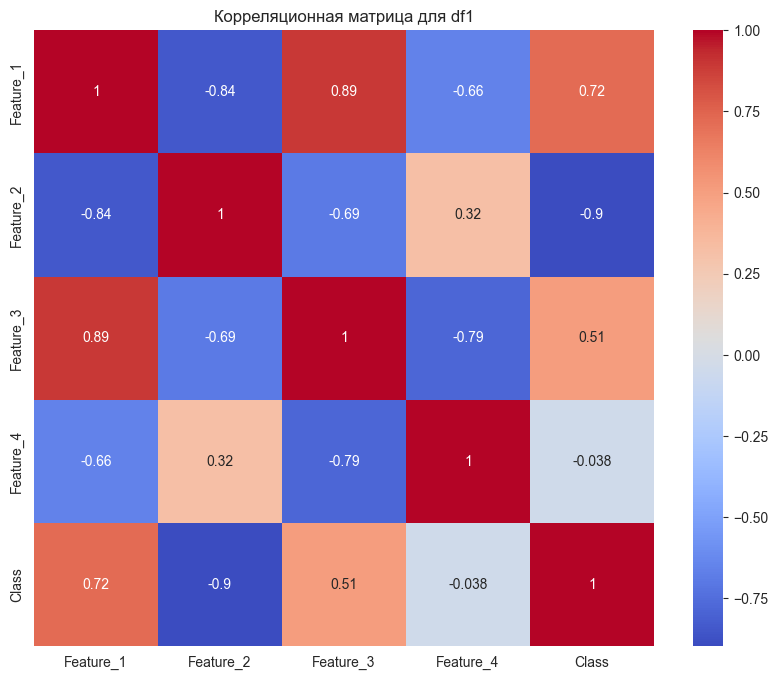

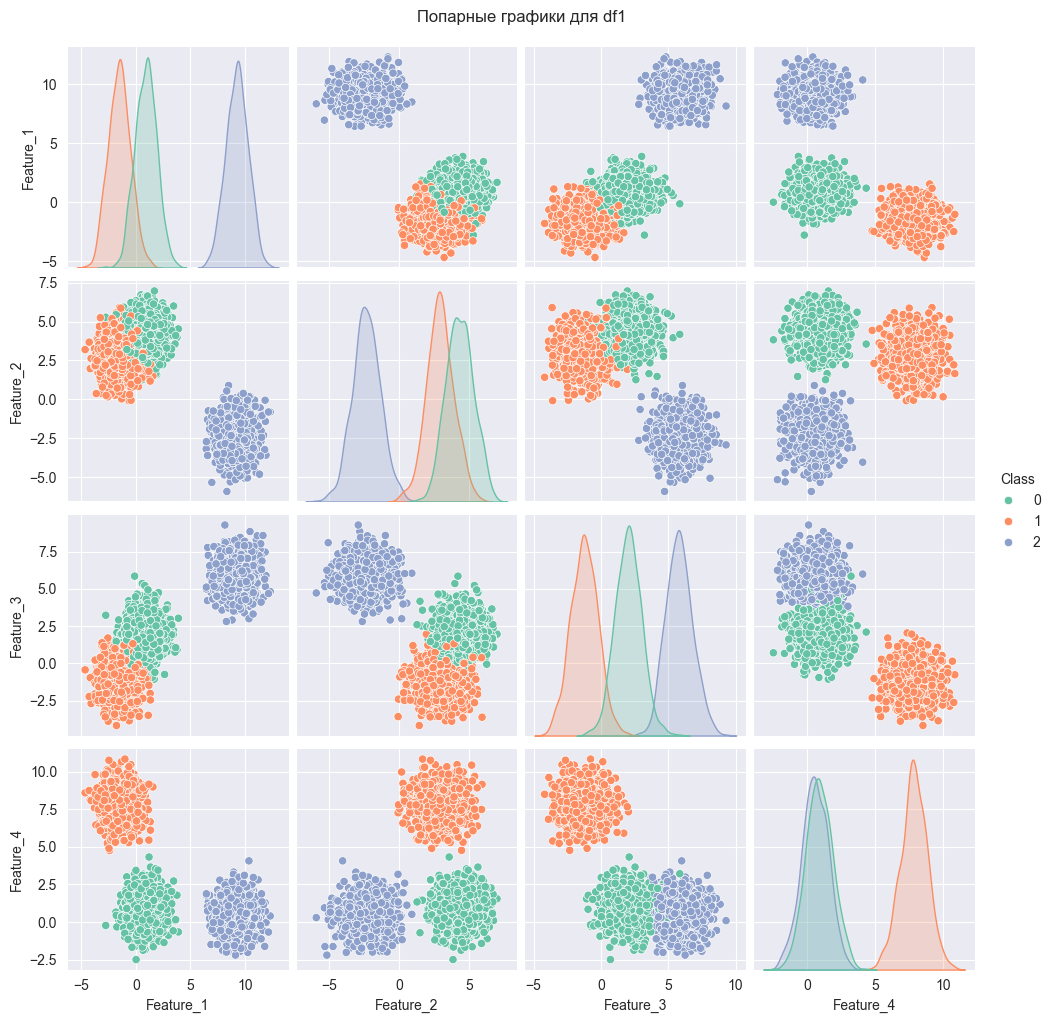

In [4]:
show_plot(df1, "df1")

## Задание 3

[3] На основе созданного в пункте [1] датасета сгенерировать отдельные дополнительные датасеты (df2, df5, df10…), в которых объекты одного класса повторены 2 раза, 5 раз, 10 раз, 20 раз, 50 раз, 100 раз, 1000 раз, 10k раз, а количество объектов в остальных классов неизменно.


In [5]:
def create_repeated_class_datasets(df, class_label, repetitions):
    df_repeated = df[df['Class'] == class_label].copy()
    df_repeated = df_repeated.loc[df_repeated.index.repeat(repetitions)].reset_index(drop=True)
    df_remaining = df[df['Class'] != class_label]
    df_new = pd.concat([df_repeated, df_remaining], ignore_index=True)
    return df_new

In [6]:
df2 = create_repeated_class_datasets(df1, class_label=0, repetitions=2)
df5 = create_repeated_class_datasets(df1, class_label=0, repetitions=5)
df10 = create_repeated_class_datasets(df1, class_label=0, repetitions=10)
df20 = create_repeated_class_datasets(df1, class_label=0, repetitions=20)
df50 = create_repeated_class_datasets(df1, class_label=0, repetitions=50)
df100 = create_repeated_class_datasets(df1, class_label=0, repetitions=100)
df1000 = create_repeated_class_datasets(df1, class_label=0, repetitions=1000)
df10k = create_repeated_class_datasets(df1, class_label=0, repetitions=10000)

[4] Выбрать пару классов (включая класс с повторенными объектами) и пару количественных признаков.  
Используя метод LDA (линейный дискриминантный анализ), для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k, построить решающую функцию алгоритма, разграниченные решающей функцией зоны и отдельные
объекты классов.

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np


def build_lda(df, name, feature_names, classes):
    df_selected = df[df['Class'].isin(classes)][feature_names + ['Class']]
    lda = LDA()
    X = df_selected[feature_names]
    y = df_selected['Class']

    lda.fit(X.values, y)

    x_min, x_max = X[feature_names[0]].min() - 1, X[feature_names[0]].max() + 1
    y_min, y_max = X[feature_names[1]].min() - 1, X[feature_names[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.scatter(X[feature_names[0]], X[feature_names[1]], c=y, cmap='coolwarm', edgecolors='k')

    plt.title(f'LDA - {name}')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

In [8]:
datasets = [df1, df2, df5, df10, df20, df50, df100, df1000, df10k]
names = ['df1', 'df2', 'df5', 'df10', 'df20', 'df50', 'df100', 'df1000', 'df10k']

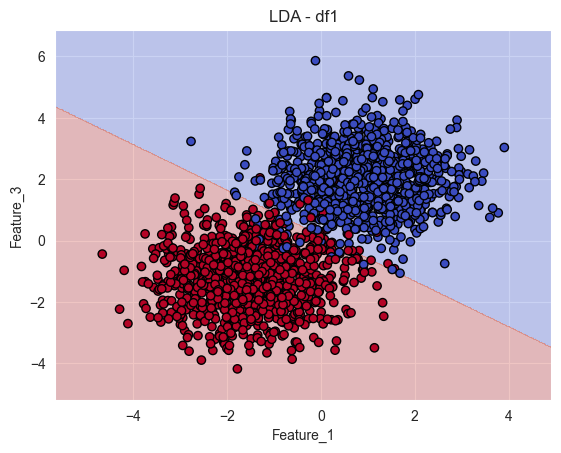

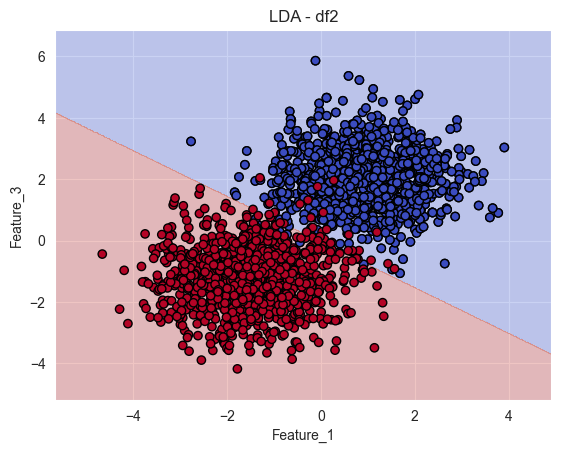

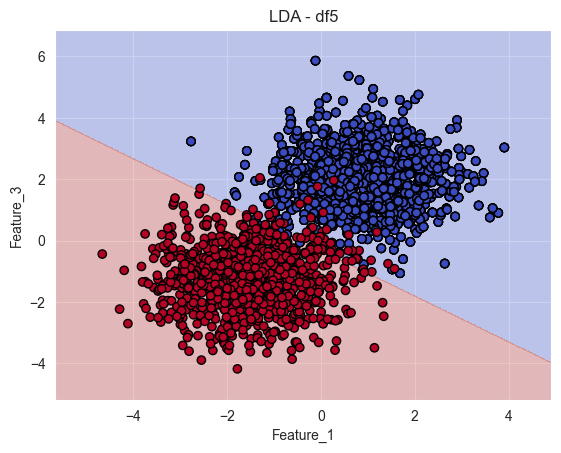

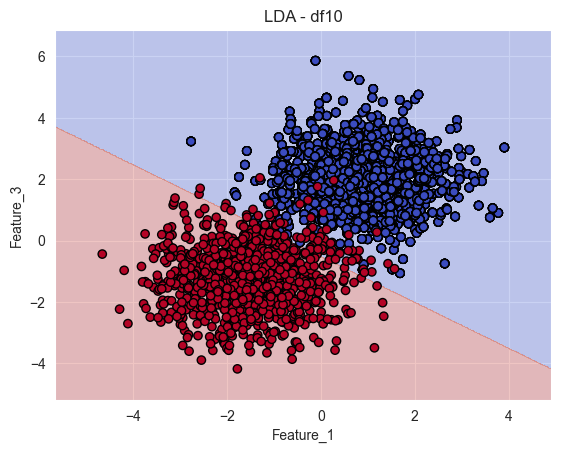

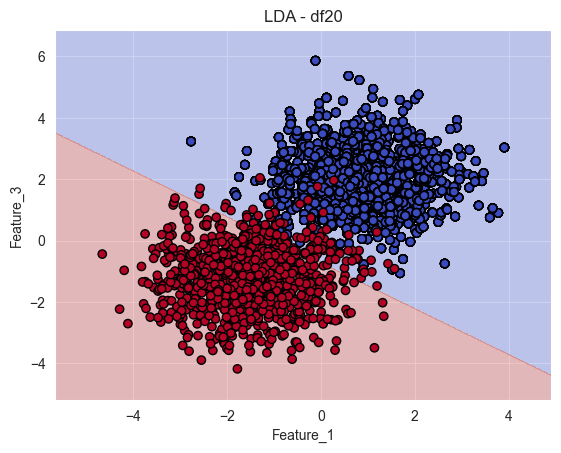

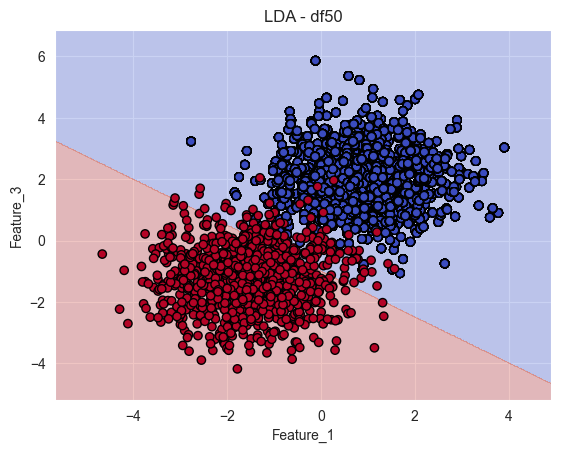

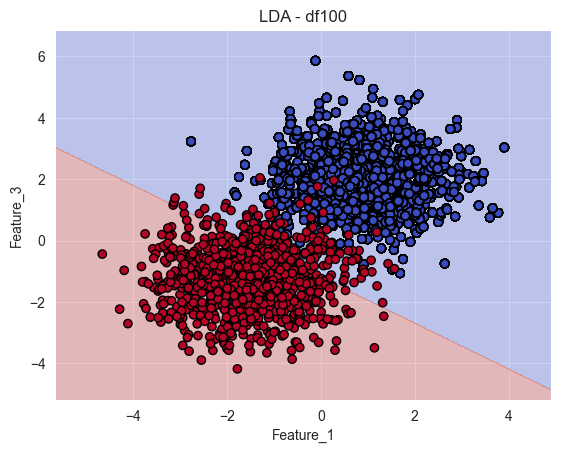

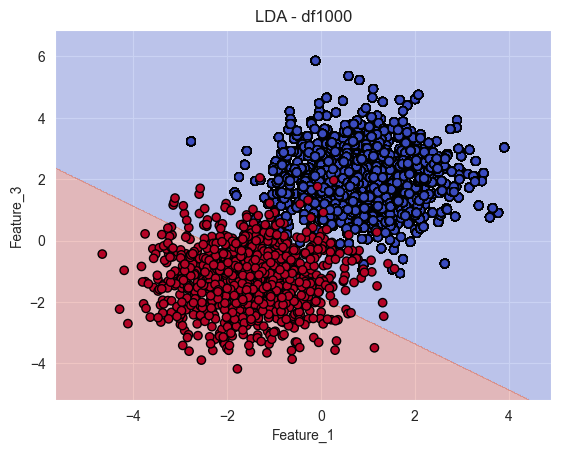

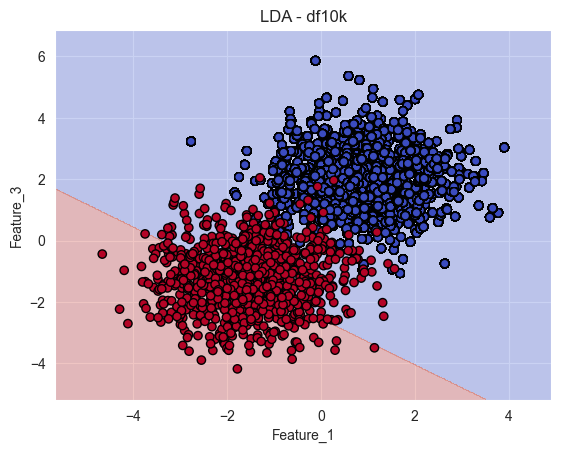

In [9]:
for df, name in zip(datasets, names):
    build_lda(df, name, feature_names=['Feature_1', 'Feature_3'], classes=[0, 1])

## Задание 5

[5] Повторить пункт [4] для алгоритма SVM.

In [10]:
# Создаем список датасетов
# datasets = [df1, df2, df5, df10, df20, df50, df100]
# names = ['df1', 'df2', 'df5', 'df10','df20', 'df50', 'df100']

In [11]:
from sklearn.svm import SVC
import numpy as np


def build_svm(df, name, feature_names, classes):
    df_selected = df[df['Class'].isin(classes)][feature_names + ['Class']]
    X = df_selected[feature_names]
    y = df_selected['Class']
    class_weight = 'balanced'
    C = 1.0

    svm = SVC(kernel='linear', class_weight=class_weight, C=C)
    svm.fit(X.values, y)

    x_min, x_max = X[feature_names[0]].min() - 1, X[feature_names[0]].max() + 1
    y_min, y_max = X[feature_names[1]].min() - 1, X[feature_names[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    plt.scatter(X[feature_names[0]], X[feature_names[1]], c=y, cmap='coolwarm', edgecolors='k')

    plt.title(f'SVM - {name}')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

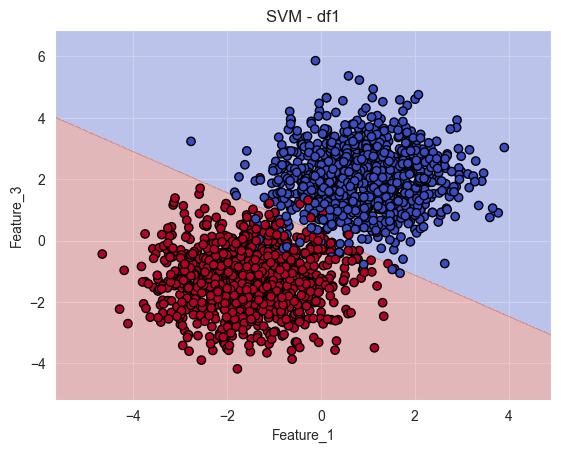

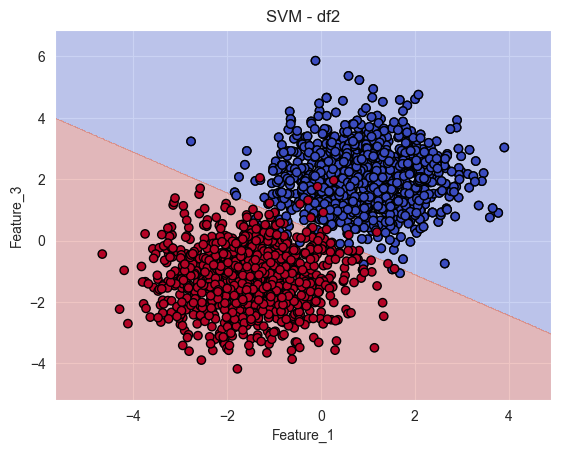

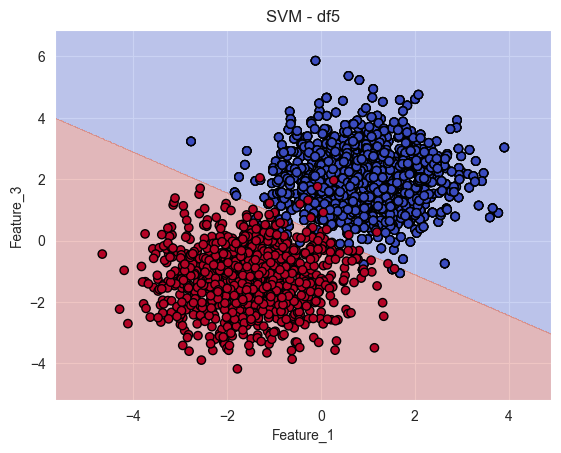

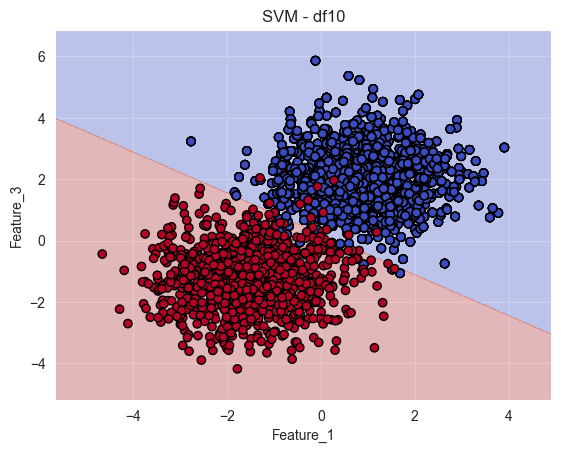

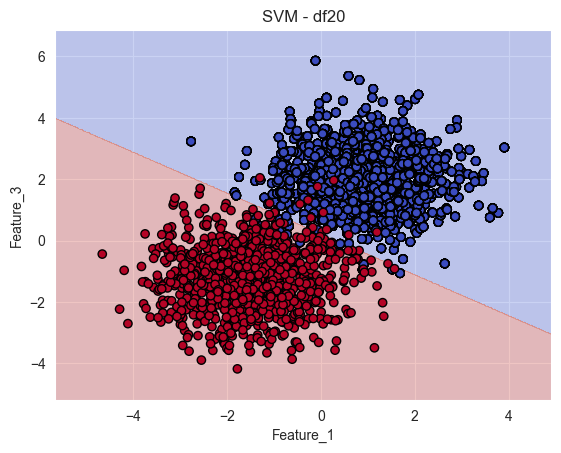

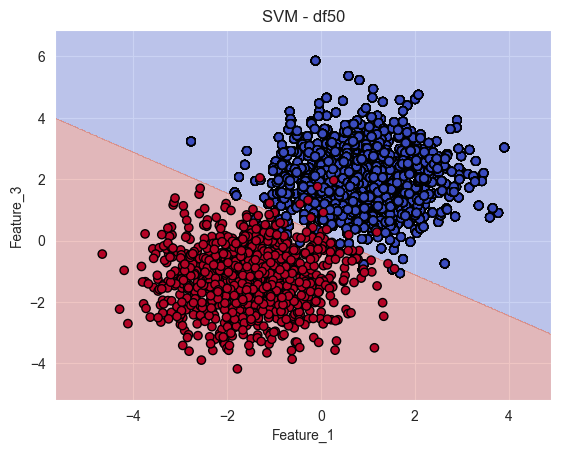

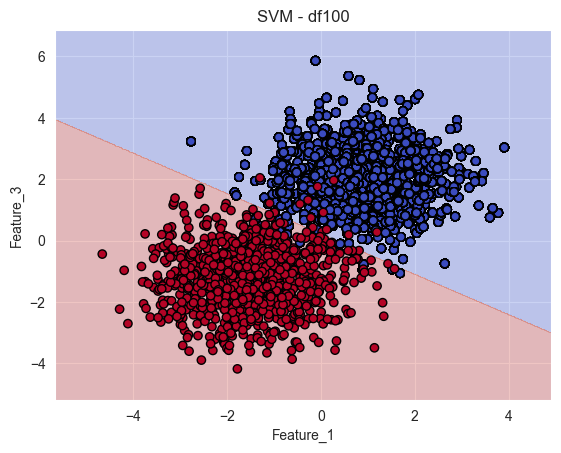

In [12]:
for df, name in zip(datasets, names[:7]):
    build_svm(df, name, feature_names=['Feature_1', 'Feature_3'], classes=[0, 1])

## Задание 6

[6] Для каждого из датасетов df1, df2, df5, df10, df20, df50, df100, df1000, df10k из пункта [4] восстановить в таблицу координаты следующих точек:
- центр отрезка, соединяющего центры масс выбранных классов
- общий центр масс выбранных классов
- точку пересечения решающей функции и отрезка, соединяющего центры масс выбранных классов.
В виде графиков визуализировать зависимости между количеством повторов в классе с повторенными объектами и координатами найденных точек.

In [13]:
def calculate_mass_centers(df, class_labels, feature_names):
    # Выбираем только два класса и два признака
    df_selected = df[df['Class'].isin(class_labels)][feature_names + ['Class']]

    # Разделяем на признаки и целевой вектор
    X = df_selected[feature_names]
    y = df_selected['Class']

    # Вычисляем центры масс для двух классов
    center_class_0 = X[y == class_labels[0]].mean().values
    center_class_1 = X[y == class_labels[1]].mean().values

    # Вычисляем общий центр масс для двух классов
    common_center = X.mean().values

    # Центр отрезка, соединяющего центры масс классов
    center_segment = (center_class_0 + center_class_1) / 2

    # Обучаем LDA
    lda = LDA()
    lda.fit(X, y)

    # Получаем параметры разделяющей функции (w0 + w1*x1 + w2*x2 = 0)
    coef = lda.coef_[0]
    intercept = lda.intercept_[0]

    # Уравнение отрезка, соединяющего центры масс классов (линейное уравнение)
    # Мы можем найти параметрическую форму уравнения и подставить в уравнение LDA
    t = np.linspace(0, 1, 500)
    segment_line = np.outer(t, center_class_1) + np.outer((1 - t), center_class_0)

    # Ищем точку пересечения решающей функции с отрезком
    decision_boundary_values = np.dot(segment_line, coef) + intercept
    idx_intersection = np.argmin(np.abs(decision_boundary_values))
    intersection_point = segment_line[idx_intersection]

    # Возвращаем данные
    return {
        'center_segment': center_segment,
        'common_center': common_center,
        'intersection_point': intersection_point,
        'center_0': center_class_0,
        'center_1': center_class_1
    }

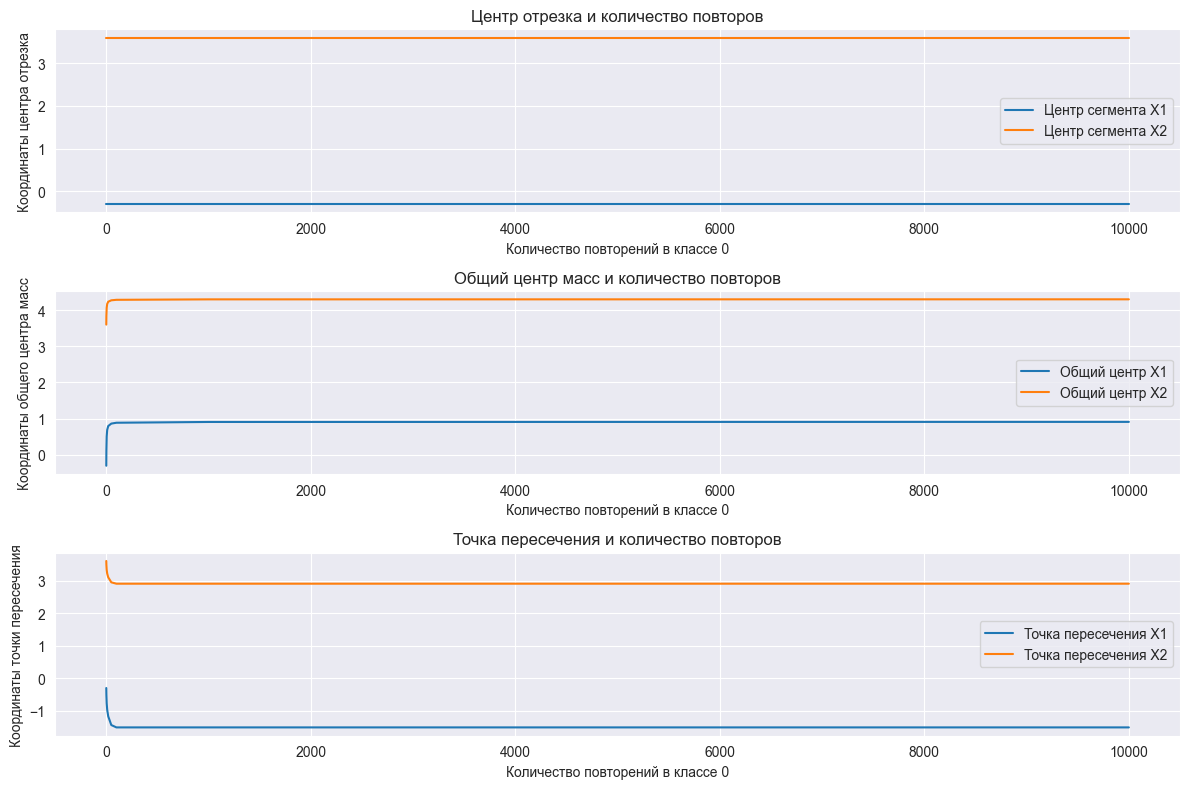

  dataset                           center_class_1  \
0     df1  [0.909518095618739, 4.3021614018030645]   
1     df2  [0.9095180956187388, 4.302161401803061]   
2     df5  [0.9095180956187385, 4.302161401803062]   
3    df10  [0.9095180956187385, 4.302161401803064]   
4    df20  [0.9095180956187388, 4.302161401803063]   
5    df50  [0.9095180956187386, 4.302161401803063]   
6   df100  [0.9095180956187386, 4.302161401803063]   
7  df1000  [0.9095180956187388, 4.302161401803063]   
8   df10k   [0.9095180956187379, 4.30216140180306]   

                             center_class_2  \
0  [-1.5185228920686096, 2.902252658757465]   
1  [-1.518522892068609, 2.9022526587574635]   
2  [-1.518522892068609, 2.9022526587574635]   
3  [-1.518522892068609, 2.9022526587574635]   
4  [-1.518522892068609, 2.9022526587574635]   
5  [-1.518522892068609, 2.9022526587574635]   
6  [-1.518522892068609, 2.9022526587574635]   
7  [-1.518522892068609, 2.9022526587574635]   
8  [-1.518522892068609, 2.9022526587

In [14]:
centers_segment = []
common_centers = []
intersection_points = []
repetitions = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]

# Вычисляем координаты для каждого датасета
table = []
for i, df in enumerate(datasets):
    results = calculate_mass_centers(df, class_labels=[0, 1], feature_names=['Feature_1', 'Feature_2'])

    # Сохраняем координаты
    centers_segment.append(results['center_segment'])
    common_centers.append(results['common_center'])
    intersection_points.append(results['intersection_point'])
    table.append({
        'dataset': names[i],
        'center_class_1': results['center_0'],
        'center_class_2': results['center_1'],
        'overall_center': results['common_center'],
        'intersection_point': results['intersection_point']
    })
res = pd.DataFrame(table)

# Преобразуем данные в numpy массивы для удобства
centers_segment = np.array(centers_segment)
common_centers = np.array(common_centers)
intersection_points = np.array(intersection_points)

# Визуализация зависимости координат от количества повторов
plt.figure(figsize=(12, 8))

# Центр отрезка
plt.subplot(3, 1, 1)
plt.plot(repetitions, centers_segment[:, 0], label='Центр сегмента X1')
plt.plot(repetitions, centers_segment[:, 1], label='Центр сегмента X2')
plt.xlabel('Количество повторений в классе 0')
plt.ylabel('Координаты центра отрезка')
plt.title('Центр отрезка и количество повторов')
plt.legend()

# Общий центр масс
plt.subplot(3, 1, 2)
plt.plot(repetitions, common_centers[:, 0], label='Общий центр X1')
plt.plot(repetitions, common_centers[:, 1], label='Общий центр X2')
plt.xlabel('Количество повторений в классе 0')
plt.ylabel('Координаты общего центра масс')
plt.title('Общий центр масс и количество повторов')
plt.legend()

# Точка пересечения решающей функции
plt.subplot(3, 1, 3)
plt.plot(repetitions, intersection_points[:, 0], label='Точка пересечения X1')
plt.plot(repetitions, intersection_points[:, 1], label='Точка пересечения X2')
plt.xlabel('Количество повторений в классе 0')
plt.ylabel('Координаты точки пересечения')
plt.title('Точка пересечения и количество повторов')
plt.legend()

plt.tight_layout()
plt.show()
print(res)

## Задание 7

[7] Выбрать целевой класс для решений из пункта [4].
Для каждого из решений из пункта [4]:
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC.

In [15]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import precision_score, recall_score, auc


# Функция для расчета AUROC, AUPRC, AUPRgainC
def calculate_metrics(df, class_labels, feature_names, target_class):
    # Выбираем только два класса и два признака
    df_selected = df[df['Class'].isin(class_labels)][feature_names + ['Class']]

    # Разделяем на признаки и целевой вектор
    X = df_selected[feature_names]
    y = (df_selected['Class'] == target_class).astype(int)  # Целевой класс как бинарный вектор

    # Обучаем LDA
    lda = LDA()
    lda.fit(X, y)

    # Прогнозируем вероятности для целевого класса
    y_score = lda.predict_proba(X)[:, target_class]  # Вероятности для целевого класса

    # 1. ROC кривая и AUROC
    fpr, tpr, _ = roc_curve(y, y_score, pos_label=target_class)
    roc_auc = auc(fpr, tpr)

    # 2. PR кривая и AUPRC
    pr_auc = average_precision_score(y, y_score, pos_label=target_class)

    return {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'fpr': fpr,
        'tpr': tpr,
    }

## Задание 8

[8] В пункте [7] выбрать другой целевой класс.
- Построить ROC кривую и рассчитать метрику AUROC.
- Построить PR кривую и рассчитать метрику AUPRC.
- (*) Построить PRgain кривую и рассчитать метрику AUPRgainC.

In [16]:
def plot_roc_pr(metrics, dataset_name):
    # ROC кривая
    plt.figure(figsize=(12, 8))

    # ROC кривая
    plt.subplot(2, 2, 1)
    plt.plot(metrics['fpr'], metrics['tpr'], label=f'AUROC = {metrics["roc_auc"]:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend()

    # PR кривая
    plt.subplot(2, 2, 2)
    plt.plot(metrics['recall'], metrics['precision'], label=f'AUPRC = {metrics["pr_auc"]:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PR Curve - {dataset_name}')
    plt.legend()

    # # PRGain кривая
    # plt.subplot(2, 2, 3)
    # plt.plot(metrics['recall_gain'], metrics['precision_gain'], label=f'AUPRgainC = {metrics["pr_gain_auc"]:.2f}')
    # plt.xlabel('Recall Gain')
    # plt.ylabel('Precision Gain')
    # plt.title(f'PRGain Curve - {dataset_name}')
    # plt.legend()

    plt.tight_layout()
    plt.show()

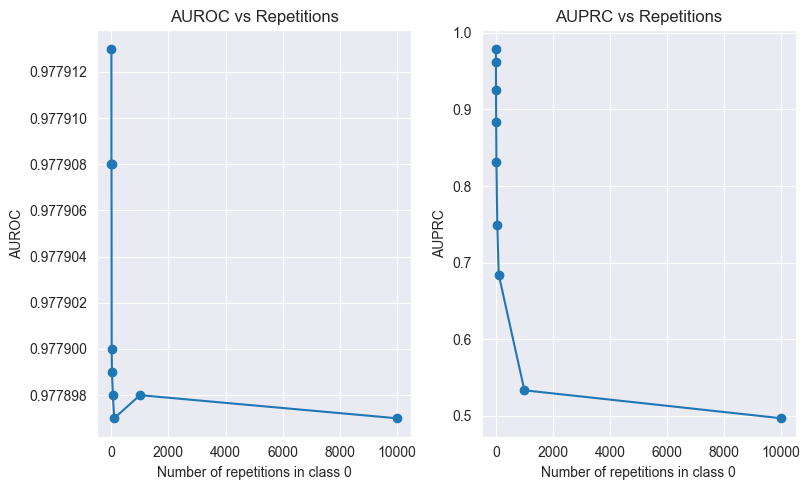

In [17]:
roc_aucs = []
pr_aucs = []
pr_gain_aucs = []
repetitions = [1, 2, 5, 10, 20, 50, 100, 1000, 10000]

# Для всех датасетов
datasets = [df1, df2, df5, df10, df20, df50, df100, df1000, df10k]

for i, df in enumerate(datasets):
    metrics = calculate_metrics(df, class_labels=[0, 1], feature_names=['Feature_1', 'Feature_2'], target_class=1)

    # Сохраняем метрики
    roc_aucs.append(metrics['roc_auc'])
    pr_aucs.append(metrics['pr_auc'])
    # pr_gain_aucs.append(metrics['pr_gain_auc'])

# Построение зависимости AUROC, AUPRC и AUPRgain от количества повторов
plt.figure(figsize=(12, 5))

# AUROC
plt.subplot(1, 3, 1)
plt.plot(repetitions, roc_aucs, marker='o', label='AUROC')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('AUROC')
plt.title('AUROC vs Repetitions')
plt.grid(True)

# AUPRC
plt.subplot(1, 3, 2)
plt.plot(repetitions, pr_aucs, marker='o', label='AUPRC')
plt.xlabel('Number of repetitions in class 0')
plt.ylabel('AUPRC')
plt.title('AUPRC vs Repetitions')
plt.grid(True)

plt.tight_layout()
plt.show()

## Задание 9

[9] Для датасета 10k на основе 3-fold, 5-fold, 10-fold, 20-fold, 50-fold, 100-fold кроссвалидации построить кривые AUROC и AUPRC c доверительными интервалами (CI95). Вместо CI95 можно взять CI90, CI80 или другой вариант доверительного интервала.


In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression  # пример модели, замените на нужную вам

# Определите вашу модель (предиктор)
predictor = LogisticRegression()

In [19]:
def bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Бутстрепинг с повторной выборкой
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue  # Пропуск, если в выборке только один класс

        fpr, tpr, _ = roc_curve(y_real[indices], y_proba[indices])
        score = auc(fpr, tpr)
        bootstrapped_scores.append(score)

    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)

    return lower_bound, upper_bound

In [20]:
def bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for i in range(n_bootstraps):
        # Бутстрепинг с повторной выборкой
        indices = rng.randint(0, len(y_proba), len(y_proba))
        if len(np.unique(y_real[indices])) < 2:
            continue  # Пропуск, если в выборке только один класс

        precision, recall, _ = precision_recall_curve(y_real[indices], y_proba[indices])
        score = auc(recall, precision)
        bootstrapped_scores.append(score)

    sorted_scores = np.sort(bootstrapped_scores)
    lower_bound = np.percentile(sorted_scores, (100 - ci) / 2)
    upper_bound = np.percentile(sorted_scores, 100 - (100 - ci) / 2)

    return lower_bound, upper_bound

In [21]:
def show_fold(df, k):
    y_real = []
    y_proba = []
    precision_array = []
    roc_tpr_array = []
    recall_array = np.linspace(0, 1, 100)  # Массив значений Recall для PR
    roc_fpr_array = np.linspace(0, 1, 100)  # Массив значений FPR для ROC
    df_selected = df[df['Class'].isin([0, 1])][['Feature_1', 'Feature_2'] + ['Class']]
    X = df_selected[['Feature_1', 'Feature_2']]
    y = df_selected['Class']
    skf = StratifiedKFold(n_splits=k)
    # Подготовка графиков
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Один график для PR, другой для ROC

    # Для каждого fold вычисляем PR и ROC кривые
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
        ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

        # Обучаем модель
        predictor.fit(Xtrain, ytrain)
        pred_proba = predictor.predict_proba(Xtest)

        # Вычисляем Precision-Recall для каждого fold
        precision_fold, recall_fold, _ = precision_recall_curve(ytest, pred_proba[:, 1])
        precision_fold, recall_fold = precision_fold[::-1], recall_fold[::-1]  # reverse order of results

        # Интерполяция Precision по общему массиву Recall
        prec_array = np.interp(recall_array, recall_fold, precision_fold)
        pr_auc = auc(recall_array, prec_array)
        precision_array.append(prec_array)

        lab_fold_pr = 'Fold %d AUPR=%.4f' % (i + 1, pr_auc)
        axes[0].plot(recall_fold, precision_fold, alpha=0.3)  # , label=lab_fold_pr

        # ROC-кривая для каждого fold
        fpr_fold, tpr_fold, _ = roc_curve(ytest, pred_proba[:, 1])
        roc_auc = auc(fpr_fold, tpr_fold)
        roc_tpr_interp = np.interp(roc_fpr_array, fpr_fold, tpr_fold)
        roc_tpr_array.append(roc_tpr_interp)

        lab_fold_roc = 'Fold %d AUROC=%.4f' % (i + 1, roc_auc)
        axes[1].plot(fpr_fold, tpr_fold, alpha=0.3)  # , label=lab_fold_roc

        # Собираем все реальные значения и предсказанные вероятности для бутстреппинга
        y_real.append(ytest)
        y_proba.append(pred_proba[:, 1])

    # Объединяем реальные значения и вероятности для общего расчета
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)

    # Общая PR-кривая
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    lab_pr = 'Overall AUPR=%.4f' % (auc(recall, precision))
    axes[0].plot(recall, precision, lw=2, color='red', label=lab_pr)

    # Общая ROC-кривая
    fpr, tpr, _ = roc_curve(y_real, y_proba)
    lab_roc = 'Overall AUROC=%.4f' % (auc(fpr, tpr))
    axes[1].plot(fpr, tpr, lw=2, color='red', label=lab_roc)

    # Расчет доверительного интервала CI95 для общей PR-кривой
    lower_ci_pr, upper_ci_pr = bootstrap_pr_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_precision = np.mean(precision_array, axis=0)
    std_precision = np.std(precision_array, axis=0)

    # Вычисляем нижнюю и верхнюю границы доверительного интервала для PR
    ci_lower_pr, ci_upper_pr = mean_precision - std_precision, mean_precision + std_precision
    axes[0].fill_between(recall_array, ci_lower_pr, ci_upper_pr, alpha=0.2, color='grey',
                         label=f'95% CI [{lower_ci_pr:.4f}, {upper_ci_pr:.4f}]')

    # Расчет доверительного интервала CI95 для общей ROC-кривой
    lower_ci_roc, upper_ci_roc = bootstrap_roc_auc(y_real, y_proba, n_bootstraps=1000, ci=95)
    mean_tpr = np.mean(roc_tpr_array, axis=0)
    std_tpr = np.std(roc_tpr_array, axis=0)

    # Вычисляем нижнюю и верхнюю границы доверительного интервала для ROC
    ci_lower_roc, ci_upper_roc = mean_tpr - std_tpr, mean_tpr + std_tpr
    axes[1].fill_between(roc_fpr_array, ci_lower_roc, ci_upper_roc, alpha=0.2, color='grey',
                         label=f'95% CI [{lower_ci_roc:.4f}, {upper_ci_roc:.4f}]')

    # Настройка графиков
    axes[0].legend(loc='lower left', fontsize='small')
    axes[0].set_title("PR curves with CI95; {} folds".format(skf.n_splits), weight="bold", fontsize=15)
    axes[0].set_xlabel("Recall (Sensitivity)", fontsize=12)
    axes[0].set_ylabel("Precision (PPV)", fontsize=12)

    axes[1].legend(loc='lower right', fontsize='small')
    axes[1].set_title("ROC curves with CI95; {} folds".format(skf.n_splits), weight="bold", fontsize=15)
    axes[1].set_xlabel("False Positive Rate", fontsize=12)
    axes[1].set_ylabel("True Positive Rate", fontsize=12)

    plt.tight_layout()
    plt.show()

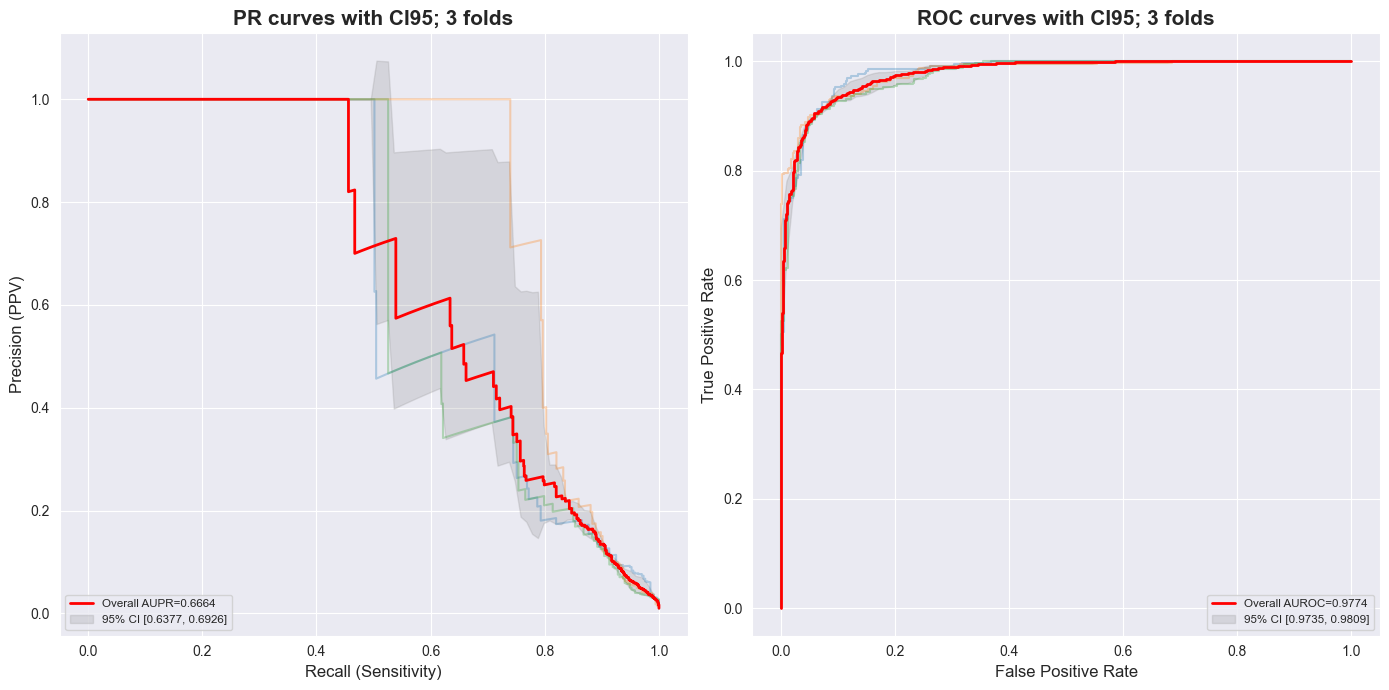

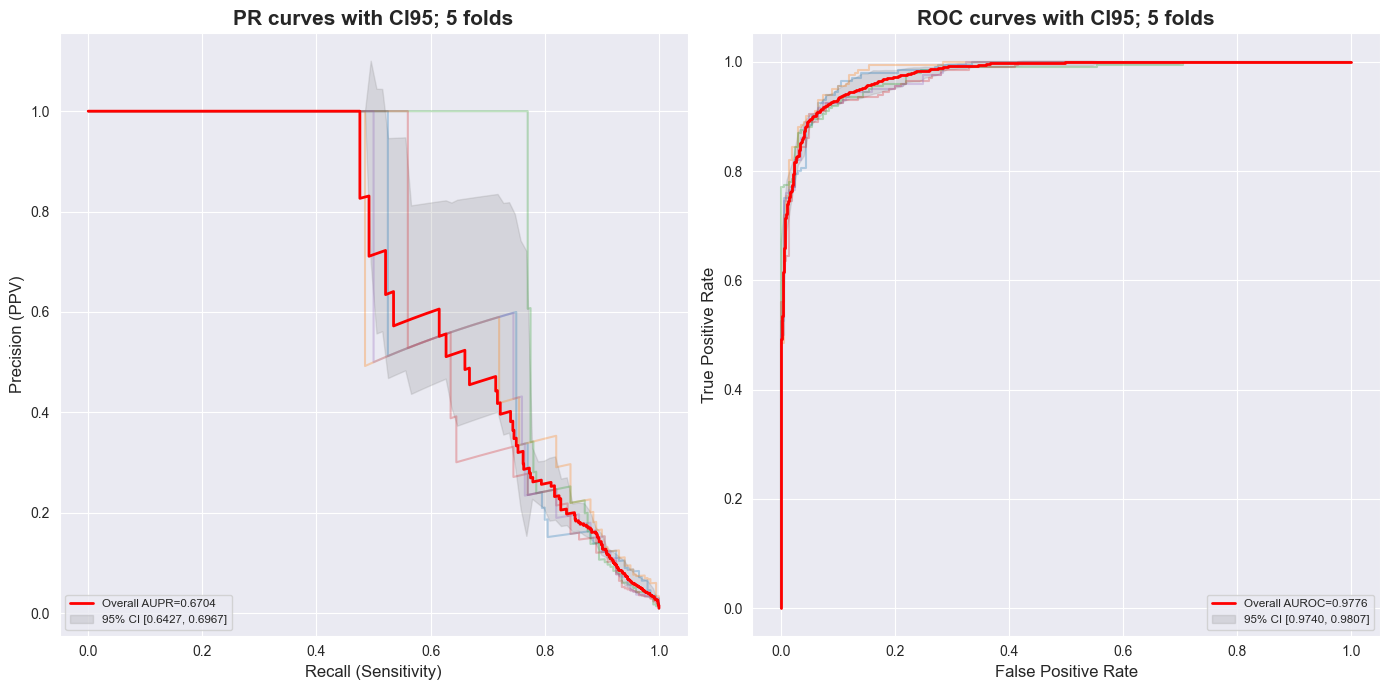

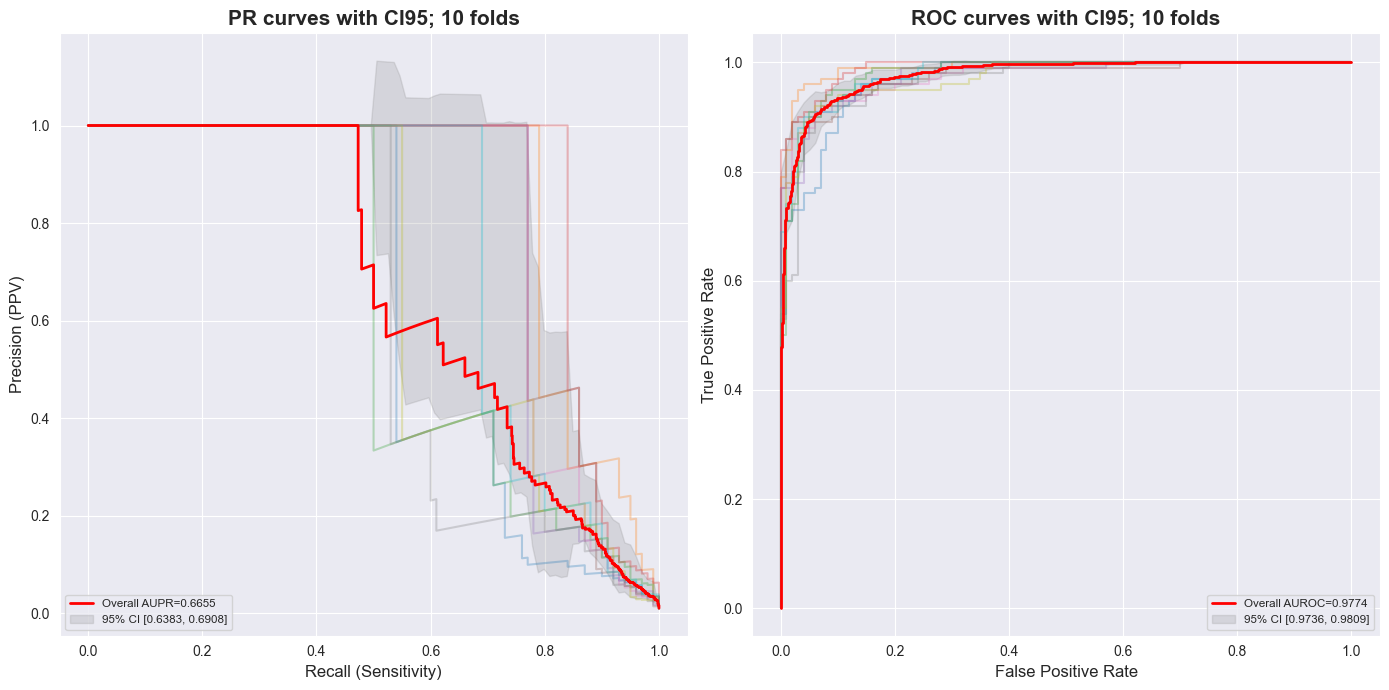

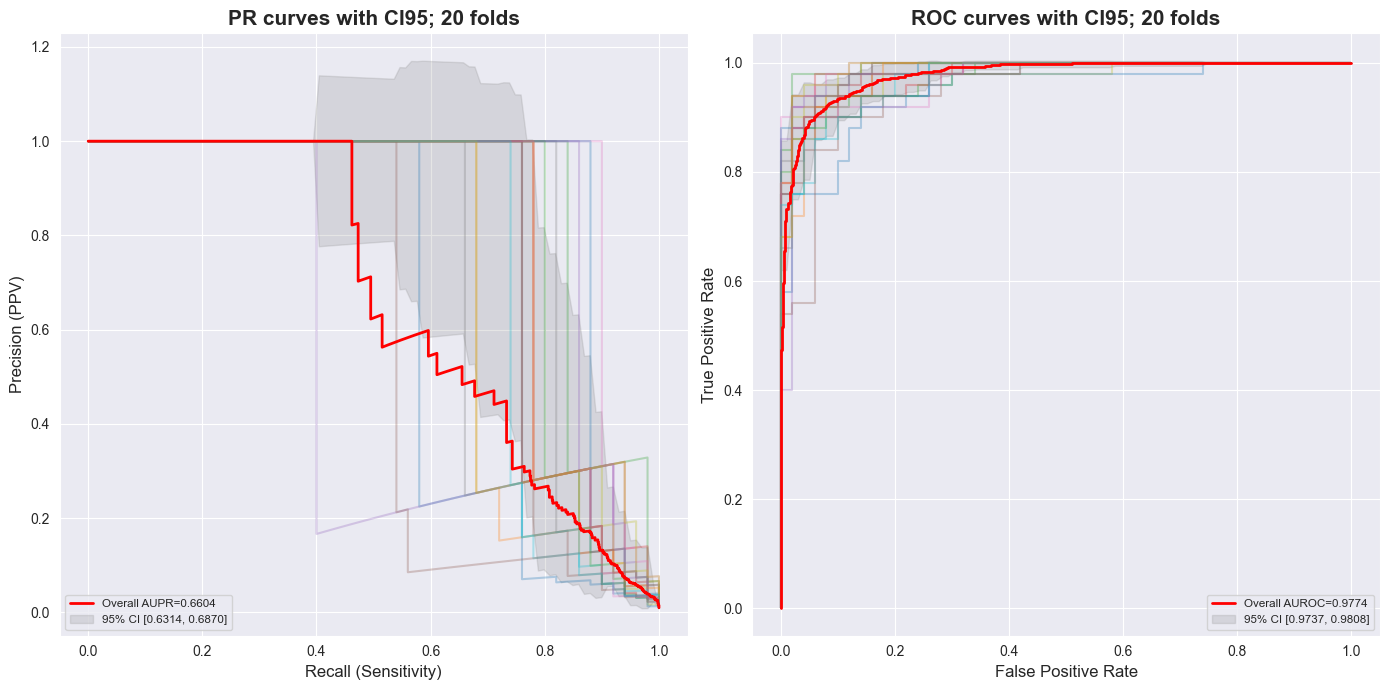

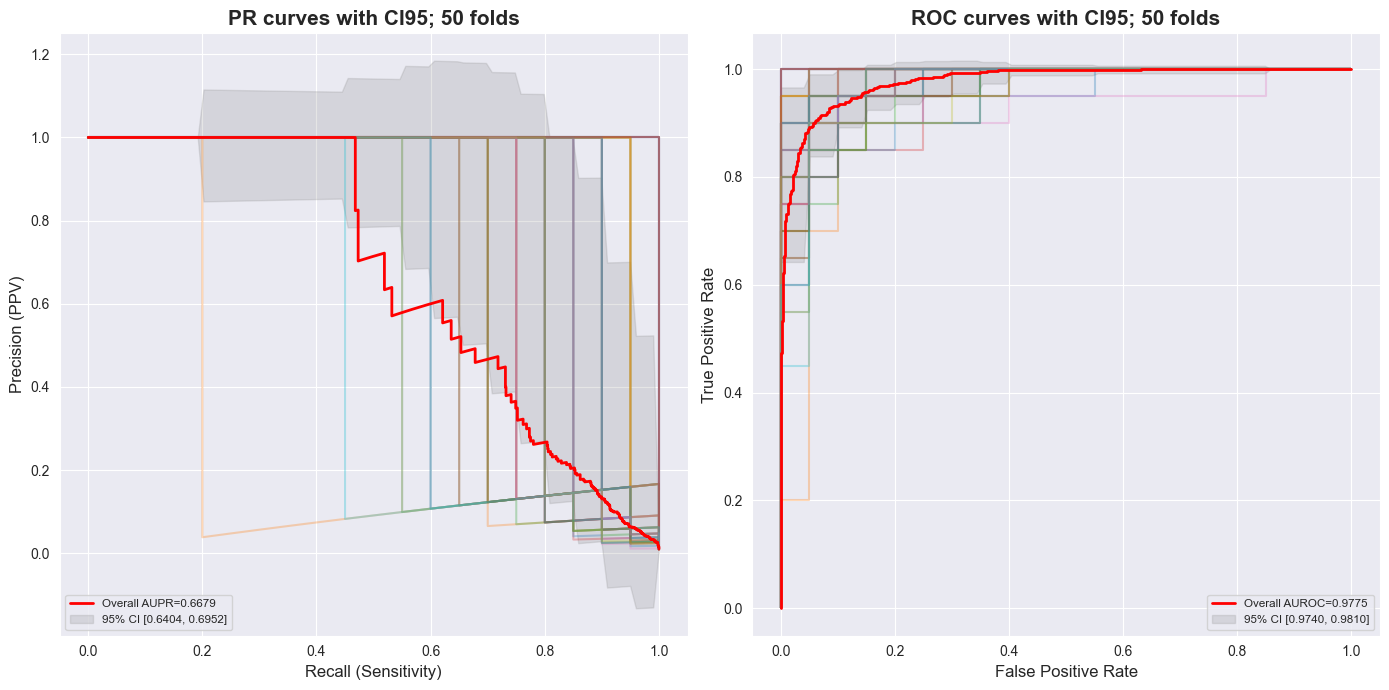

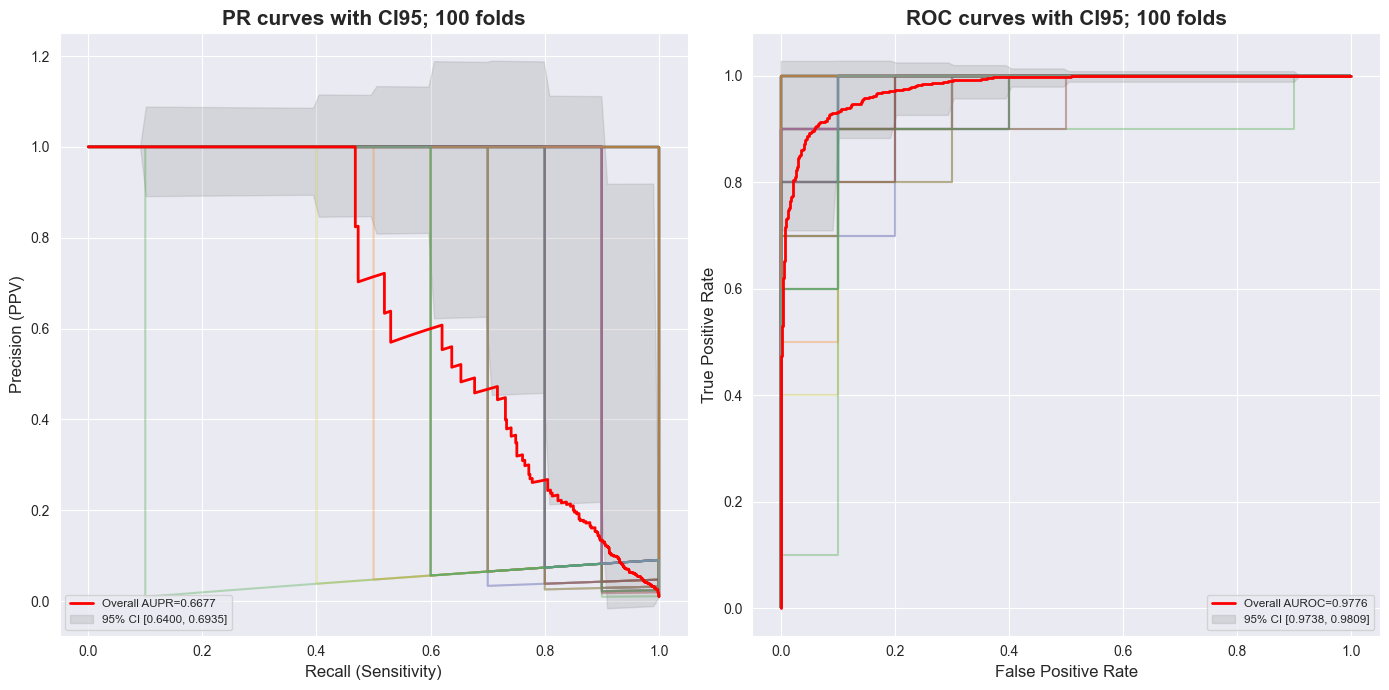

In [22]:
folds = [3, 5, 10, 20, 50, 100]
for k in folds:
    show_fold(df100, k)